In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import newton

In [7]:
ac  = 7.5657307e-16 # Radiation constant
R   = 300.0         # Gas constant
gam = 1.4           # Ratio of specific heats

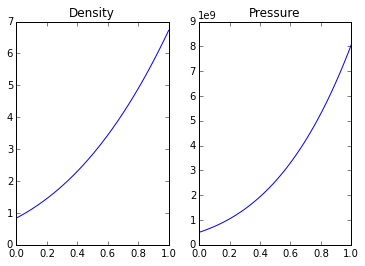

In [8]:
def radpre(T):
    return ac*T**4/3.0

def temperature(x):
    return 1.0e6 * (1.0 + x)

xmin, xmax = 0.0, 1.0
n = 100
x = np.linspace(xmin, xmax, n)
T = temperature(x)
pr  = radpre(T)
# We take gas pressure = radiation pressure
rho = pr/(R*T)
pg = rho*R*T
pex = pg + pr
# Gravitational potential
phi = -8.0*R*T

plt.subplot(1,2,1)
plt.plot(x, rho)
plt.title('Density')
plt.subplot(1,2,2)
plt.plot(x, pex)
plt.title('Pressure');

# Quadrature to compute hydrostatic solution

In [9]:
def logavg(a, b):
    xi = b/a
    f = (xi - 1.0) / (xi + 1.0)
    u = f * f
    if (u < 1.0e-2):
        u2 = u * u
        u3 = u2 * u
        FF = 1.0 + u/3.0 + u2/5.0 + u3/7.0
    else:
        FF = log(xi)/2.0/f
    return 0.5*(a+b)/FF

def foo(p, p1, T1, T2, phi1, phi2):
    beta1 = (1.0 - radpre(T1)/p1)/R
    beta2 = (1.0 - radpre(T2)/p)/R
    theta = logavg( T1/beta1, T2/beta2 )
    psi = -(phi2 - phi1)/theta
    return p*np.exp(-psi) - p1

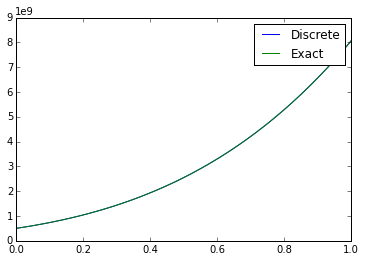

In [10]:
p = 0*x
p[0] = pex[0]
for i in range(1,len(p)):
    fun = lambda pp: foo(pp,p[i-1],T[i-1],T[i],phi[i-1],phi[i])
    p[i] = newton(fun, p[i-1])
plt.plot(x,p,x,pex)
plt.legend(("Discrete","Exact"));